# Detect hoofs that have abnormal shape (binary classification)

# Data preparation

### Load in kinetic data as X

In [1]:
#####################################################################
############## read in kinetic data ##################################
#####################################################################

## read in kinetic data 
## into shape 
## x_train:  (data size, rows, columns)
## x_test:  (data size, rows, columns)

import numpy as np
import pandas as pd
import xlrd
import glob
#import numpy as np
import random
from matplotlib import pyplot as plt


# list of names of files 
file_names = []
# X is the data before preprocess
X = np.zeros((70, 70, 50))
# load in every excel file from kinetic_processed
for i, xls_file in enumerate(glob.glob("kinetic_processed/*")):
    # append into file_names list
    file_names.append(xls_file)
    #print(xls_file)
    # exclude column index and create panda dataframe
    dataframe = pd.read_excel(xls_file).iloc[:, 1:]
    # convert into numpy array and store into X
    matrix = dataframe.to_numpy()
    #print(matrix.shape)
    X[i] = matrix
    
print("total number of examples: ", X.shape[0])
print("dimension of one examples: ", X.shape[1], X.shape[2])
print("obtain array X with shape: ", X.shape)

total number of examples:  70
dimension of one examples:  70 50
obtain array X with shape:  (70, 70, 50)


### Cut one image into 4 hoofs and resize into: hoof_set

In [2]:
#####################################################################
############## cut one matrix into four hoofs as: hoof_set  #########
#####################################################################

def cut_into4(X, pad=False):
    # init a new dataset to store hoofs: hoof_set 
    #hoof_set = np.zeros((280, 30, 20))
    hoof_set = []
    # loop through all 70 cows 
    for cow in range(70):
        # take one matrix 
        one_matrix = X[cow, :, :]
        
        """control padding"""
        if pad == True: 
            # if pad, pad 5 zeros to the surounding
            one_matrix = np.pad(one_matrix, [(5, 5), (5, 5)], mode='constant')
            
            # for each hoof, we crop it with height 30 and width 20 
            # top left hoof
            top_left = one_matrix[:35, :25] 
            # top right hoof 
            top_right = one_matrix[:35, -25:] 
            # bottom left hoof 
            bottom_left = one_matrix[-35:, :25] 
            # bottom right hoof 
            bottom_right = one_matrix[-35:, -25:] 

        else: 
            # for each hoof, we crop it with height 30 and width 20 
            # top left hoof
            top_left = one_matrix[:30, :20] 
            # top right hoof 
            top_right = one_matrix[:30, -20:] 
            # bottom left hoof 
            bottom_left = one_matrix[-30:, :20] 
            # bottom right hoof 
            bottom_right = one_matrix[-30:, -20:] 
            
        #imshow(top_left)
        #imshow(top_right)
        #imshow(bottom_left)
        #imshow(bottom_right)
        hoof_set.append(top_left)
        hoof_set.append(top_right)
        hoof_set.append(bottom_left)
        hoof_set.append(bottom_right)
        
    return np.array(hoof_set)
    
# use this function
hoof_set = cut_into4(X, pad=True)

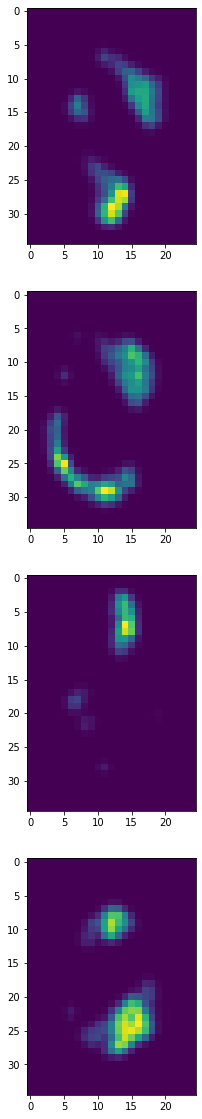

In [3]:
#####################################################################
############## inspect each 4 hoofs in hoof_set  ####################
#####################################################################

"""
args
    -- check: index of cow that need to check 
    from 0-70
return 
    -- print four hoofs of that cow
"""
def check_4hoofs(hoof_set, check): 
    
    check = check * 4
    """    imshow(hoof_set[check])
        imshow(hoof_set[check+1])
        imshow(hoof_set[check+2])
        imshow(hoof_set[check+3])"""
    
    # Here we create a figure instance, and two subplots
    fig = plt.figure(figsize = (5,20)) # width x height
    ax1 = fig.add_subplot(4, 1, 1) # row, column, position
    ax2 = fig.add_subplot(4, 1, 2)
    ax3 = fig.add_subplot(4, 1, 3)
    ax4 = fig.add_subplot(4, 1, 4)


    # We use ax parameter to tell seaborn which subplot to use for this plot
    ax1.imshow(hoof_set[check],  interpolation='nearest')
    ax2.imshow(hoof_set[check+1],  interpolation='nearest')
    ax3.imshow(hoof_set[check+2],  interpolation='nearest')
    ax4.imshow(hoof_set[check+3],  interpolation='nearest')

#print("inspect hoof_set: ", len(hoof_set))
"""use function to check each 70 hoof sets (4 hoofs in each set)"""
check_4hoofs(hoof_set, 0)

### read in hoof_score_number as label Y 

In [4]:
#####################################################################
############## read in excel file: hoof_score_number  ###############
#####################################################################

# name of the excel file
excel = 'hoof_score_number.xlsx'
# read in by panda
df_hoof = pd.read_excel(excel)
# dropping the rows having NaN values
df_hoof = df_hoof.dropna()
# convert into numpy array: np_hoof
np_hoof = np.array(df_hoof)
# convert into list: ls_hoof
ls_hoof = np_hoof.tolist()
# strip extra dimension
ls_hoof_int = [i[0] for i in ls_hoof]

#print("obtain np_hoof with shape: ", np_hoof.shape)
print("obtain ls_hoof_int with length: ", len(ls_hoof_int))

obtain ls_hoof_int with length:  280


### Create binary label bi_ls_hoof

check length:  280
obtain bi_ls_hoof
----- Value -----
[0, 1]
----- Count -----
[219, 61]


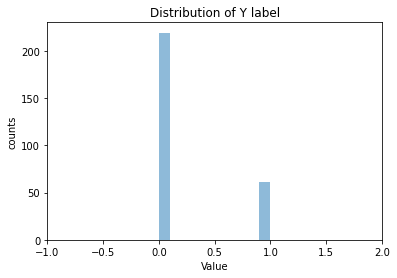

In [5]:
#####################################################################
############## convert into binary label: obtain bi_ls_hoof  ########
#####################################################################

# try binary label 
"""
arg: 
    -- list with 1, 2, 3 
return: 
    -- list with 0, 1
"""
def binarize_ls_hoof(ls): 
    # init new_ls
    new_ls = []
    for i in ls: 
        # class 1 is normal shape
        if int(i) == 1 : 
            new_ls.append(1) 
        # class 0 is abnormla shape
        elif int(i) == 3 or int(i) == 2: 
            new_ls.append(0) 
        else: 
            print("encounter invalid number")
    print("check length: ", len(new_ls))
    return new_ls

# func to print the number for different scores 
from collections import Counter
"""
arg: 
    -- y: a list 
return: 
    -- a histogram
"""
def inspect_y(y, plot=True): 
    print("----- Value -----")
    print([i for i in Counter(y).keys()]) # equals to list(set(words))
    print("----- Count -----")
    print([i for i in Counter(y).values()]) # counts the elements' frequency
    
    if plot:
        data = y
        plt.xlim([min(data)-1, max(data)+1])
        plt.hist(data, alpha=0.5)
        plt.title('Distribution of Y label')
        plt.xlabel('Value')
        plt.ylabel('counts')
        plt.show()
    
# convert ls_hoof into binary number
bi_ls_hoof = binarize_ls_hoof(ls_hoof_int)
# inspect bi_ls_hoof
print("obtain bi_ls_hoof")
inspect_y(bi_ls_hoof)

### Standardize X

In [6]:
#####################################################################
############## standardization  #####################################
#####################################################################

print("bi_ls_hoof with length: ", len(bi_ls_hoof))
print("hoof_set with shape: ", hoof_set.shape)

# function to inspect dataset 
def inspect_stat(X):
    print("-------------------------")
    print("shape: ", X.shape)
    print("min(): ", X.min())
    print("max(): ", X.max())
    print("mean(): ", X.mean())
    print("std(): ", X.std())
    print("-------------------------")

# standardize dataset 
hoof_set_temp = hoof_set - hoof_set.min() 
hoof_set_std = hoof_set_temp / hoof_set.std()

# normalization 
hoof_set_nor = hoof_set / hoof_set.max()

# inspect dataset
print()
print("inspect hoof_set_std: ")
inspect_stat(hoof_set_std)
print("inspect hoof_set_nor: ")
inspect_stat(hoof_set_nor)

bi_ls_hoof with length:  280
hoof_set with shape:  (280, 35, 25)

inspect hoof_set_std: 
-------------------------
shape:  (280, 35, 25)
min():  0.0
max():  68.68309502870136
mean():  0.22942673016445073
std():  1.0000000000000002
-------------------------
inspect hoof_set_nor: 
-------------------------
shape:  (280, 35, 25)
min():  0.0
max():  1.0
mean():  0.0033403667972239396
std():  0.014559623435462821
-------------------------


# Building model

### Split to train and test

In [54]:
#####################################################################
############## spliting into train and test and reshape for tf  #####
#####################################################################

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    # our X
    hoof_set_nor, 
    # our Y
    np.array(bi_ls_hoof), 
    # training / testing ratio
    test_size=0.35, 
    random_state=123)


# Data augmentation

### Shifting

In [55]:
#####################################################################
############## here we choose shifting and filping  #################
#####################################################################

"""
func: 
    --shift to left, right, up and down 3 
args: 
    --x_train: (182, 35, 25)
    --y_train: (182,)
    --shift: unit of shift
return: 
    --x_train_shift: (182*4, 35, 25)
    --y_train_shift: (182*4,)    
"""
def shifting(x_train, y_train, shift): 
    # init x_train_shift and y_train_shift
    #x_train_shift = np.zeros((x_train.shape[0]*4, x_train.shape[1], x_train.shape[2])
    #y_train_shift = np.zeros((y_train_shift[0], ))
    
    x_train_shift = []
    y_train_shift = []
    
    # get height and width 
    height, width = x_train.shape[1], x_train.shape[2]
    
    # loop through all x_train 
    for i in range(x_train.shape[0]):
        # shift left
        left = x_train[i, :, :width-shift]
        #print(left.shape)
        # https://stackoverflow.com/questions/35751306/python-how-to-pad-numpy-array-with-zeros
        left = np.pad(left, [(0, 0), (shift, 0)], mode='constant')
        #print(left.shape)
        x_train_shift.append(left)
        y_train_shift.append(y_train[i])
        
        # shift right
        right = x_train[i, :, shift:]
        #print(right.shape)
        right = np.pad(right, [(0, 0), (0, shift)], mode='constant')
        #print(right.shape)
        x_train_shift.append(right)
        y_train_shift.append(y_train[i])    
        
        # shift up 
        up = x_train[i, :height-shift, :]
        #print(up.shape)
        up = np.pad(up, [(shift, 0), (0, 0)], mode='constant')
        #print(up.shape)
        x_train_shift.append(up)
        y_train_shift.append(y_train[i])   
        
        # shift down
        down = x_train[i, shift:, :]
        #print(down.shape)
        down = np.pad(down, [(0, shift), (0, 0)], mode='constant')
        #print(down.shape)
        x_train_shift.append(down)
        y_train_shift.append(y_train[i])  
        
    # convert into numpy array and return 
    return np.array(x_train_shift), np.array(y_train_shift)
        


In [56]:
"""create shifting"""
x_train_shift4, y_train_shift4 = shifting(x_train, y_train, shift=4)
x_train_shift3, y_train_shift3 = shifting(x_train, y_train, shift=3)
x_train_shift2, y_train_shift2 = shifting(x_train, y_train, shift=2)
x_train_shift1, y_train_shift1 = shifting(x_train, y_train, shift=1)
# inspect shape 
print("x_train_shift, y_train_shift: ", x_train_shift4.shape, y_train_shift4.shape)

"""concatenate shifting"""
x_train_sh = np.concatenate((x_train, x_train_shift1, x_train_shift2, x_train_shift3), axis=0)
y_train_sh = np.concatenate((y_train, y_train_shift1, y_train_shift1, y_train_shift3), axis=0)
# inspect shape 
print("x_train_sh, y_train_sh: ", x_train_sh.shape, y_train_sh.shape)

x_train_shift, y_train_shift:  (728, 35, 25) (728,)
x_train_sh, y_train_sh:  (2366, 35, 25) (2366,)


### Filpping

In [57]:
"""
func: 
    -- to filp the dataset 
arg: 
    -- x_train 
    -- y_train 
return: 
    -- x_train_f: include original 
    -- y_train_f: include original 
"""
def filpping(x_train, y_train): 
    
    # init return dataset
    x_train_f = []
    y_train_f = []
    
    # loop through x_train to filp matrices
    for i in range(x_train.shape[0]):
        # get left right filpped
        left_right = np.fliplr(x_train[i])
        # get up down filpped
        up_down = np.flipud(x_train[i])
        # append x
        x_train_f.append(x_train[i])
        x_train_f.append(left_right) 
        x_train_f.append(up_down)
        # append y 
        y_train_f.append(y_train[i])
        y_train_f.append(y_train[i])
        y_train_f.append(y_train[i])
    
    # return dataset as array 
    return   np.array(x_train_f), np.array(y_train_f)

x_train_f, y_train_f = filpping(x_train_sh, y_train_sh)
# inspect shape 
print("x_train_f, y_train_f: ", x_train_f.shape, y_train_f.shape)

x_train_f, y_train_f:  (7098, 35, 25) (7098,)


### Add to train and test

In [58]:
import numpy as np
import tensorflow as tf
from tensorflow import keras as keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization as BN
from keras import backend as k

In [59]:
"""here we assgin x_train_f, y_train_f to x_train, y_train"""
# x_train, y_train = x_train_f, y_train_f
print("SET HERE FOR DATA AUGUMENTATION OR NOT")

# expand dimension
x_train = tf.expand_dims(x_train, 3)
x_test = tf.expand_dims(x_test, 3)

print("check dimension =====: ")
print("x_train.shape: ", x_train.shape)
print("x_test.shape: ", x_test.shape)
print("y_train.shape: ", y_train.shape)
print("y_test.shape: ", y_test.shape)

print("inspect y_test =====: ")
#inspect_y(y_test, plot=False)

SET HERE FOR DATA AUGUMENTATION OR NOT
check dimension =====: 
x_train.shape:  (182, 35, 25, 1)
x_test.shape:  (98, 35, 25, 1)
y_train.shape:  (182,)
y_test.shape:  (98,)
inspect y_test =====: 


### Define model

### LeNet 

In [60]:
#####################################################################
############## building model  ######################################
#####################################################################
import tensorflow.keras.models as models
from tensorflow.keras.layers import Conv2D, Dropout, AveragePooling2D, MaxPooling2D, Flatten, Dense

# init input
"""define input shape"""
shape=(35, 25, 1)

CNN_model = models.Sequential()

CNN_model.add(Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=shape))
CNN_model.add(AveragePooling2D())
CNN_model.add(Dropout(0.20))

CNN_model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
CNN_model.add(AveragePooling2D())
CNN_model.add(Dropout(0.20))

CNN_model.add(Flatten())
CNN_model.add(Dense(units=120, activation='relu'))
CNN_model.add(Dense(units=84, activation='relu'))
CNN_model.add(Dense(units=1, activation = 'sigmoid'))

CNN_model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_85 (Conv2D)          (None, 33, 23, 6)         60        
                                                                 
 average_pooling2d_2 (Averag  (None, 16, 11, 6)        0         
 ePooling2D)                                                     
                                                                 
 dropout_2 (Dropout)         (None, 16, 11, 6)         0         
                                                                 
 conv2d_86 (Conv2D)          (None, 14, 9, 16)         880       
                                                                 
 average_pooling2d_3 (Averag  (None, 7, 4, 16)         0         
 ePooling2D)                                                     
                                                                 
 dropout_3 (Dropout)         (None, 7, 4, 16)         

In [62]:
##############################################################
############## training LeNet#################################
##############################################################

class F1Score(keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.tp = self.add_weight(name='true_positives', initializer='zeros')
        self.fp = self.add_weight(name='false_positives', initializer='zeros')
        self.fn = self.add_weight(name='false_negatives', initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        # Cast y_true and y_pred to the correct type
        y_true = tf.cast(y_true, tf.bool)
        y_pred = tf.cast(y_pred > 0.5, tf.bool)  # Threshold prediction at 0.5

        # True positives, false positives, and false negatives
        self.tp.assign_add(tf.reduce_sum(tf.cast(y_true & y_pred, tf.float32)))
        self.fp.assign_add(tf.reduce_sum(tf.cast(~y_true & y_pred, tf.float32)))
        self.fn.assign_add(tf.reduce_sum(tf.cast(y_true & ~y_pred, tf.float32)))

    def result(self):
        precision = self.tp / (self.tp + self.fp + tf.keras.backend.epsilon())
        recall = self.tp / (self.tp + self.fn + tf.keras.backend.epsilon())
        return 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))

    def reset_states(self):
        self.tp.assign(0)
        self.fp.assign(0)
        self.fn.assign(0)

"""define model loss metrics"""
# compile model 
CNN_model.compile(optimizer=keras.optimizers.Adam(),
              # define loss metric
              loss=keras.losses.binary_crossentropy,
              metrics=[F1Score()])

# define callback to save best model
checkpoint_filepath = './tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_f1_score',
    mode='max',
    save_best_only=True)

"""fit the model and store the training/ validation curve in the history"""
history = CNN_model.fit(    
    x_train,
    y_train,
    epochs=100,
    validation_data=(x_test, y_test), 
    callbacks=[model_checkpoint_callback])

Epoch 1/100
6/6 [==============================] - 1s 65ms/step - loss: 0.0832 - f1_score: 0.9318 - val_loss: 0.2214 - val_f1_score: 0.7500
Epoch 2/100
6/6 [==============================] - 0s 23ms/step - loss: 0.1468 - f1_score: 0.8537 - val_loss: 0.3178 - val_f1_score: 0.7660
Epoch 3/100
6/6 [==============================] - 0s 27ms/step - loss: 0.0973 - f1_score: 0.9070 - val_loss: 0.2072 - val_f1_score: 0.8000
Epoch 4/100
6/6 [==============================] - 0s 16ms/step - loss: 0.1099 - f1_score: 0.8861 - val_loss: 0.2069 - val_f1_score: 0.8000
Epoch 5/100
6/6 [==============================] - 0s 12ms/step - loss: 0.1189 - f1_score: 0.9213 - val_loss: 0.3236 - val_f1_score: 0.7917
Epoch 6/100
6/6 [==============================] - 0s 15ms/step - loss: 0.0927 - f1_score: 0.9213 - val_loss: 0.2425 - val_f1_score: 0.7568
Epoch 7/100
6/6 [==============================] - 0s 13ms/step - loss: 0.1052 - f1_score: 0.9157 - val_loss: 0.2581 - val_f1_score: 0.7805
Epoch 8/100
6/6 [===

6/6 [==============================] - 0s 13ms/step - loss: 0.0384 - f1_score: 0.9630 - val_loss: 0.5356 - val_f1_score: 0.7500
Epoch 60/100
6/6 [==============================] - 0s 15ms/step - loss: 0.0422 - f1_score: 0.9639 - val_loss: 0.5498 - val_f1_score: 0.7317
Epoch 61/100
6/6 [==============================] - 0s 13ms/step - loss: 0.0547 - f1_score: 0.9647 - val_loss: 0.4639 - val_f1_score: 0.7692
Epoch 62/100
6/6 [==============================] - 0s 15ms/step - loss: 0.0413 - f1_score: 0.9762 - val_loss: 0.3903 - val_f1_score: 0.7368
Epoch 63/100
6/6 [==============================] - 0s 14ms/step - loss: 0.0505 - f1_score: 0.9512 - val_loss: 0.5173 - val_f1_score: 0.7442
Epoch 64/100
6/6 [==============================] - 0s 15ms/step - loss: 0.0700 - f1_score: 0.9655 - val_loss: 0.5049 - val_f1_score: 0.7692
Epoch 65/100
6/6 [==============================] - 0s 14ms/step - loss: 0.0625 - f1_score: 0.9500 - val_loss: 0.5588 - val_f1_score: 0.7368
Epoch 66/100
6/6 [========

--------------------------------------------------------------
Best training accuracy of:  1.0  at epoch:  82

--------------------------------------------------------------
Best validation accuracy of:  0.829268217086792  at epoch:  13



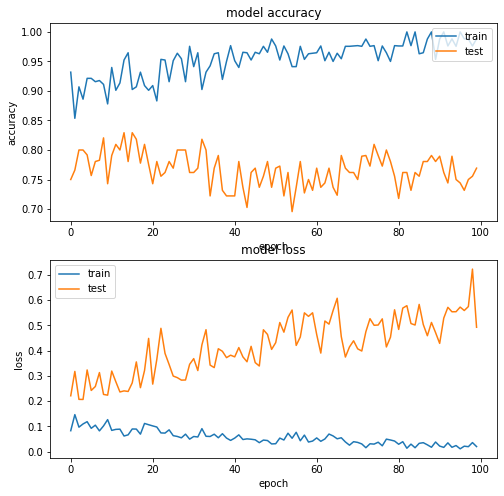

In [63]:
####################################################################
############## inspect training process  ###########################
####################################################################

best_acc = max(history.history['f1_score'])
best_epoch_acc = history.history['f1_score'].index(best_acc)
print("--------------------------------------------------------------")
print("Best training accuracy of: ", best_acc, " at epoch: ", best_epoch_acc)
print()

best_val = max(history.history['val_f1_score'])
best_epoch = history.history['val_f1_score'].index(best_val)
print("--------------------------------------------------------------")
print("Best validation accuracy of: ", best_val, " at epoch: ", best_epoch)
print()

# plot training history
plt.figure(figsize=(8,8))

# plot history for accuracy
plt.subplot(211)
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

# plot history for loss
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Inception CNN

In [64]:
input_img = Input(shape=(35, 25, 1))

# Layer 1
layer1_tower_1 = Conv2D(2, (1, 1), padding='same', activation='relu')(input_img)
layer1_tower_1 = Conv2D(2, (3, 3), padding='same', activation='relu')(layer1_tower_1)

layer1_tower_3 = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(input_img)
layer1_tower_3 = Conv2D(2, (1, 1), padding='same', activation='relu')(layer1_tower_3)

layer1_output = keras.layers.concatenate([layer1_tower_1, layer1_tower_3], axis=1)

# Layer 2
layer2_tower_1 = Conv2D(4, (1, 1), padding='same', activation='relu')(layer1_output)
layer2_tower_1 = Conv2D(4, (3, 3), padding='same', activation='relu')(layer2_tower_1)

layer2_tower_3 = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(layer1_output)
layer2_tower_3 = Conv2D(4, (1, 1), padding='same', activation='relu')(layer2_tower_3)

layer2_output = keras.layers.concatenate([layer2_tower_1, layer2_tower_3], axis=1)

# Flatten & Dense
layer2_output = Flatten()(layer2_output)
output = Dense(64, activation='softmax')(layer2_output)
output = Dense(4, activation='softmax')(output)
output = Dense(1, activation='sigmoid')(output)

inception_Model_datagen = Model(inputs=input_img,outputs=output)
model = Model(inputs=input_img,outputs=output)
model.summary()

Model: "model_20"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_16 (InputLayer)          [(None, 35, 25, 1)]  0           []                               
                                                                                                  
 conv2d_87 (Conv2D)             (None, 35, 25, 2)    4           ['input_16[0][0]']               
                                                                                                  
 max_pooling2d_28 (MaxPooling2D  (None, 35, 25, 1)   0           ['input_16[0][0]']               
 )                                                                                                
                                                                                                  
 conv2d_88 (Conv2D)             (None, 35, 25, 2)    38          ['conv2d_87[0][0]']       

In [68]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Function to create an Inception block
def inception_block(input_layer, filters):
    """
    Creates an Inception block with 1x1, 3x3, 5x5 convolutions, and a 3x3 max pooling.
    """
    # 1x1 convolution
    conv_1x1 = layers.Conv2D(filters, (1, 1), activation='relu', padding='same')(input_layer)

    # 3x3 convolution
    conv_3x3 = layers.Conv2D(filters, (3, 3), activation='relu', padding='same')(input_layer)

    # 5x5 convolution
    conv_5x5 = layers.Conv2D(filters, (5, 5), activation='relu', padding='same')(input_layer)

    # 3x3 max pooling
    max_pool = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(input_layer)

    # Concatenate all outputs
    output = layers.Concatenate()([conv_1x1, conv_3x3, conv_5x5, max_pool])

    return output

# Function to create an Inception-based model
def create_inception_model(input_shape):
    """
    Creates a simple Inception-based CNN model.
    """
    inputs = keras.Input(shape=input_shape)

    # First Inception block
    inception1 = inception_block(inputs, filters=16)

    # Second Inception block
    inception2 = inception_block(inception1, filters=32)

    # Flatten and dense layers
    flatten = layers.Flatten()(inception2)
    dense = layers.Dense(64, activation='relu')(flatten)

    # Output layer for binary classification
    outputs = layers.Dense(1, activation='sigmoid')(dense)  # Sigmoid for binary output

    model = keras.Model(inputs, outputs)

    # Compile the model with a suitable loss and optimizer
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model


# Create the model
input_shape = (35, 25, 1)  # Example input shape for a grayscale image
model = create_inception_model(input_shape)

# Print the model summary to see the architecture
model.summary()

Model: "model_24"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_20 (InputLayer)          [(None, 35, 25, 1)]  0           []                               
                                                                                                  
 conv2d_111 (Conv2D)            (None, 35, 25, 16)   32          ['input_20[0][0]']               
                                                                                                  
 conv2d_112 (Conv2D)            (None, 35, 25, 16)   160         ['input_20[0][0]']               
                                                                                                  
 conv2d_113 (Conv2D)            (None, 35, 25, 16)   416         ['input_20[0][0]']               
                                                                                           

In [69]:
# Create a function to run the model and evaluate with F1-Score
def train_and_evaluate_model(x_train, y_train, x_test, y_test):
    # Use the Inception model function from the previous response
    model = create_inception_model(input_shape=(35, 25, 1))
    
    # Compile the model with F1-Score
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=[F1Score()])

    # Train the model
    model.fit(x_train, y_train, epochs=20, batch_size=4, verbose=1)

    # Evaluate the model on the test data
    results = model.evaluate(x_test, y_test)

    # Get predictions for calculating F1-Score
    y_pred = model.predict(x_test) > 0.5  # Threshold at 0.5 for binary outcome

    # Calculate F1-Score using scikit-learn's f1_score
    f1 = f1_score(y_test, y_pred)

    return f1

# Run the model and get the F1-Score
from sklearn.metrics import f1_score
f1_score = train_and_evaluate_model(x_train, y_train, x_test, y_test)
print("F1-Score:", f1_score)

Epoch 1/20
46/46 [==============================] - 3s 51ms/step - loss: 0.5385 - f1_score: 0.0851
Epoch 2/20
 3/46 [>.............................] - ETA: 2s - loss: 0.4949 - f1_score: 0.0000e+00

C:\Users\15680\anaconda3\lib\site-packages\keras\engine\training.py:2319: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


46/46 [==============================] - 2s 53ms/step - loss: 0.4295 - f1_score: 0.1739
Epoch 3/20
46/46 [==============================] - 2s 50ms/step - loss: 0.3768 - f1_score: 0.5352
Epoch 4/20
46/46 [==============================] - 2s 49ms/step - loss: 0.2682 - f1_score: 0.6988
Epoch 5/20
46/46 [==============================] - 2s 50ms/step - loss: 0.2186 - f1_score: 0.7674
Epoch 6/20
46/46 [==============================] - 2s 50ms/step - loss: 0.1775 - f1_score: 0.8372
Epoch 7/20
46/46 [==============================] - 2s 52ms/step - loss: 0.1601 - f1_score: 0.8095
Epoch 8/20
46/46 [==============================] - 2s 51ms/step - loss: 0.1893 - f1_score: 0.7955
Epoch 9/20
46/46 [==============================] - 2s 53ms/step - loss: 0.1099 - f1_score: 0.9176
Epoch 10/20
46/46 [==============================] - 2s 51ms/step - loss: 0.0858 - f1_score: 0.9176
Epoch 11/20
46/46 [==============================] - 2s 54ms/step - loss: 0.0626 - f1_score: 0.9412
Epoch 12/20
46/46 [